# Canadian Data Analyst Job Listing Analysis

## Table of Contents <a id='back'></a>
- [Project Introduction](#project-introduction)
    - [Analysis Outline](#analysis-outline)
    - [Results](#results)
- [Importing Libraries and Opening Data Files](#importing-libraries-and-opening-data-files)
- [Pre-Processing Data](#pre-processing-data)
    - [Duplicates](#duplicates)
    - [Missing Values](#missing-values)
    - [Removing Irrelevant Data](#removing-irrelevant-data)
    - [Data Structure Overhaul](#data-structure-overhaul)
        - [Header Style](#header-style)
        - [Formatting and Data Usage](#formatting-and-data-usage)
- [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Job Characteristics & Availability](#)
        - [Total Available Jobs](#)
        - [Data Science Job Categories](#)
        - [Job Salaries by Type](#)
        - [Jobs Offered by Platform](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
    - [](#)
- [Conclusions and Reccomendations](#conclusions-and-reccomendations)
- [Dataset Citation](#dataset-citation)

## Project Introduction

2024 has been a difficult year for entry-level data science jobs and for this project, I am interested in analyzing the data science field job market. For this project, I am utilizing a Kaggle-based dataset that web-scraped Indeed and Glassdoor Canadian job postings for data using Selenium and BeautifulSoup. This dataset provides multiple interesting insights into the data science job market such as in-demand technical skills, expected work experience, and salary ranges.  

### Analysis Outline

[Analysis Outline]

### Results

[Results]


[Back to Table of Contents](#back)

## Importing Libraries and Opening Data Files

In [1]:
# Importing the needed libraries for this assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium

In [2]:
# Importing file for assignment
try:
    df = pd.read_csv('Raw_Dataset.csv', sep=',')
except:
    df = pd.read_csv('/datasets/Raw_Dataset.csv', sep=',')

[Back to Table of Contents](#back)

## Pre-Processing Data

### Duplicates

In [3]:
# Checking for duplicates
df.duplicated().sum()

0

[Back to Table of Contents](#back)

### Missing Values

In [4]:
# Checking for null values
df.isna().sum()

Job ID                  0
Job Title               0
Company Name            0
Language and Tools    167
Job Salary            557
City                    0
Province              118
Job Link                0
dtype: int64

In [5]:
# Filling in null values
df.fillna({'Language and Tools': 'unknown',
           'Job Salary' : 'unknown',
           'Province' : 'unknown'}, inplace = True)
df.isna().sum()

Job ID                0
Job Title             0
Company Name          0
Language and Tools    0
Job Salary            0
City                  0
Province              0
Job Link              0
dtype: int64

[Back to Table of Contents](#back)

### Removing Irrelevant Data

In [6]:
# Removing columns we do not need for this analysis
df = df.drop(columns=['Job ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           1796 non-null   object
 1   Company Name        1796 non-null   object
 2   Language and Tools  1796 non-null   object
 3   Job Salary          1796 non-null   object
 4   City                1796 non-null   object
 5   Province            1796 non-null   object
 6   Job Link            1796 non-null   object
dtypes: object(7)
memory usage: 98.3+ KB


[Back to Table of Contents](#back)

### Data Structure Overhaul

In [7]:
df.describe()

,Job Title,Company Name,Language and Tools,Job Salary,City,Province,Job Link
count,1796,1796,1796,1796,1796,1796,1796
unique,811,790,1057,855,172,14,1761
top,Business Analyst,Scotiabank,unknown,unknown,Toronto,ON,https://www.glassdoor.ca/job-listing/business-...
freq,90,24,167,557,426,949,3


#### Header Style

In [8]:
# Getting general information about the dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job Title           1796 non-null   object
 1   Company Name        1796 non-null   object
 2   Language and Tools  1796 non-null   object
 3   Job Salary          1796 non-null   object
 4   City                1796 non-null   object
 5   Province            1796 non-null   object
 6   Job Link            1796 non-null   object
dtypes: object(7)
memory usage: 98.3+ KB


,Job Title,Company Name,Language and Tools,Job Salary,City,Province,Job Link
0,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",unknown,Remote,unknown,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...
1,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",unknown,Remote,unknown,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...
2,Geophysicist/Data Analyst,Sander Geophysics Limited,unknown,unknown,Ottawa,ON,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...
3,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...
4,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...


In [9]:
#checking for snakecase format
df.columns

Index(['Job Title', 'Company Name', 'Language and Tools', 'Job Salary', 'City',
       'Province', 'Job Link'],
      dtype='object')

In [10]:
# Renaming column names to snake_case format
df = df.rename(columns={'Job Title': 'job_title',
                        'Company Name': 'employer_name',
                        'Language and Tools': 'tech_skills',
                        'Job Salary': 'salary',
                        'City': 'city',
                        'Province': 'province',
                        'Job Link': 'web_platform'})
df.columns

Index(['job_title', 'employer_name', 'tech_skills', 'salary', 'city',
       'province', 'web_platform'],
      dtype='object')

[Back to Table of Contents](#back)

#### Formatting and Data Usage

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   job_title      1796 non-null   object
 1   employer_name  1796 non-null   object
 2   tech_skills    1796 non-null   object
 3   salary         1796 non-null   object
 4   city           1796 non-null   object
 5   province       1796 non-null   object
 6   web_platform   1796 non-null   object
dtypes: object(7)
memory usage: 98.3+ KB


,job_title,employer_name,tech_skills,salary,city,province,web_platform
0,Binance Accelerator Program - Data Analyst (Risk),Binance,"Python, Sql",unknown,Remote,unknown,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...
1,Business Analyst,Canadian Nuclear Laboratories,"Power Bi, Power BI, Excel",unknown,Remote,unknown,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...
2,Geophysicist/Data Analyst,Sander Geophysics Limited,unknown,unknown,Ottawa,ON,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...
3,Business Intelligence Data Engineer,"Maximus Services, LLC","Fabric, Power BI, Sql, Machine Learning, Genes...","87,875Ã¢â‚¬â€œ$105,000 a year",Toronto,ON,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...
4,"BUSINESS INTELLIGENCE SPECIALIST, FT",Niagara Health System,"Azure, Power BI, SQL, Aws",55.39Ã¢â‚¬â€œ$62.66 an hour,Niagara,ON,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...


In [12]:
# Changing all elements into snakecase format
for column in df.columns:
  df[column] = df[column].str.lower()
  df[column] = df[column].str.replace(' ', '_')

df.head()

,job_title,employer_name,tech_skills,salary,city,province,web_platform
0,binance_accelerator_program_-_data_analyst_(risk),binance,"python,_sql",unknown,remote,unknown,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...
1,business_analyst,canadian_nuclear_laboratories,"power_bi,_power_bi,_excel",unknown,remote,unknown,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...
2,geophysicist/data_analyst,sander_geophysics_limited,unknown,unknown,ottawa,on,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...
3,business_intelligence_data_engineer,"maximus_services,_llc","fabric,_power_bi,_sql,_machine_learning,_genes...","87,875ã¢â‚¬â€œ$105,000_a_year",toronto,on,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...
4,"business_intelligence_specialist,_ft",niagara_health_system,"azure,_power_bi,_sql,_aws",55.39ã¢â‚¬â€œ$62.66_an_hour,niagara,on,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...


experience level

In [13]:
df['job_title'].unique()

array(['binance_accelerator_program_-_data_analyst_(risk)',
       'business_analyst', 'geophysicist/data_analyst',
       'business_intelligence_data_engineer',
       'business_intelligence_specialist,_ft',
       'continuous_improvement_analyst', 'it_business_process_analyst',
       'computer_programmer/analyst',
       'senior_developer,_business_intelligence',
       'opgt_mod_ã¢â‚¬â€œ_one_(1)_business_analyst_ã¢â‚¬â€œ_senior',
       'business_analyst/quality_assurance_analyst',
       'capital_&_maintenance_program_analyst', 'senior_policy_analyst',
       'business_operations_analyst_(1_year_contract)',
       'senior_business_systems_analyst',
       'research_analyst_-_translational_addiction_research_laboratory',
       'payroll_analyst', 'lead_business_analyst', 'data_analyst',
       'hr_technology_lead_and_data_analyst', 'business_data_analyst',
       '(data-driven)_marketing_analyst', 'quality_analyst',
       'technology_risk_analyst', 'technical_support_analyst_',
  

In [14]:
df['job_title'] = df['job_title'].str.replace('[^a-zA-Z0-9_]', '')

def exp_level(value):
    if 'senior' in value:
        return 'mid-senior'
    
    if 'sr' in value:
        return 'mid-senior'
    
    if 'lead' in value:
        return 'mid-senior'
    
    elif 'jr' in value:
        return 'associate'
    
    elif 'junior' in value:
        return 'associate'
    
    elif 'intermediate' in value:
        return 'associate'
    
    elif 'entry' in value:
        return 'entry-level'
    
    elif 'intern' in value:
        return 'internship'
    
    elif 'student' in value:
        return 'internship'
    
    else:
        return 'any'

df['experience_level'] = df['job_title'].apply(exp_level)
df['experience_level'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_11600\1313685109.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['job_title'] = df['job_title'].str.replace('[^a-zA-Z0-9_]', '')


array(['any', 'mid-senior', 'internship', 'associate', 'entry-level'],
      dtype=object)

job title

In [15]:
df['job_title'].unique()

array(['binance_accelerator_program__data_analyst_risk',
       'business_analyst', 'geophysicistdata_analyst',
       'business_intelligence_data_engineer',
       'business_intelligence_specialist_ft',
       'continuous_improvement_analyst', 'it_business_process_analyst',
       'computer_programmeranalyst',
       'senior_developer_business_intelligence',
       'opgt_mod__one_1_business_analyst__senior',
       'business_analystquality_assurance_analyst',
       'capital__maintenance_program_analyst', 'senior_policy_analyst',
       'business_operations_analyst_1_year_contract',
       'senior_business_systems_analyst',
       'research_analyst__translational_addiction_research_laboratory',
       'payroll_analyst', 'lead_business_analyst', 'data_analyst',
       'hr_technology_lead_and_data_analyst', 'business_data_analyst',
       'datadriven_marketing_analyst', 'quality_analyst',
       'technology_risk_analyst', 'technical_support_analyst_',
       'technical_support_analyst__

In [16]:
def clean_title(value):
    if 'data_analyst' in value:
        return 'data_analyst'
    
    elif 'scientist' in value:
        return 'data_scientist'
    
    elif 'engineer' in value:
        return 'data_engineer'
    
    elif 'business_intelligence' in value:
        return 'business_intelligence_analyst'
    
    elif 'business_system' in value:
        return 'business_systems_analyst'
    
    elif 'business_analyst' in value:
        return 'business_analyst'
    
    elif 'research' in value:
        return 'research_analyst'
    
    elif 'quality' in value:
        return 'quality_analyst'
    
    elif 'marketing' in value:
        return 'marketing_analyst'
    
    elif 'risk' in value:
        return 'risk_analyst'
    
    elif 'investment' in value:
        return 'financial_analyst'
    
    elif 'asset' in value:
        return 'financial_analyst'
    
    elif 'bank' in value:
        return 'financial_analyst'
    
    elif 'sale' in value:
        return 'financial_analyst'
    
    else:
        return 'analyst'
        
df['job_title'] = df['job_title'].apply(clean_title)
df['job_title'].unique()

array(['data_analyst', 'business_analyst', 'data_engineer',
       'business_intelligence_analyst', 'analyst',
       'business_systems_analyst', 'research_analyst',
       'marketing_analyst', 'quality_analyst', 'risk_analyst',
       'financial_analyst', 'data_scientist'], dtype=object)

company name

In [17]:
df['employer_name'].unique()

array(['binance', 'canadian_nuclear_laboratories',
       'sander_geophysics_limited', 'maximus_services,_llc',
       'niagara_health_system', 'imp_group', 'ground_effects',
       'the_city_of_vancouver', 'ontario_health', 'softline_technology',
       'dll', 'toronto_hydro', 'insurance_council_of_bc',
       'tmx_group_limited', 'royal_bank_of_canada',
       'centre_for_addiction_and_mental_health', 'cenovus_energy',
       'toronto_transit_commission', 'city_of_barrie', 'accencis_group',
       'weyburn_credit_union', 'closing_the_gap_healthcare',
       'bmo_financial_group', 'banff_caribou_properties_ltd.', 'seequent',
       'university_of_alberta', 'mackenzie_financial_corporation',
       'cloudmd_software_&_services_inc_-_can', 'banque_laurentienne',
       'b.c._college_of_nurses_and_midwives',
       'canada_life_assurance_company', 'keewee', 'snaplii', 'cae',
       'electronic_arts', 'cnooc_international', 'appcast',
       'bridgenext,_inc', 'leonardo_drs', 'autodesk',


In [18]:
df['employer_name'] = df['employer_name'].str.replace('[^a-zA-Z0-9_]', '')

def clean_employer_name(value):
    if 'financ' in value:
        return 'finance'
    
    elif 'invest' in value:
        return 'finance'
    
    elif 'capital' in value:
        return 'finance'

    elif 'wealth' in value:
        return 'finance'
    
    elif 'manage' in value:
        return 'finance'
    
    elif 'credit' in value:
        return 'finance'
    
    elif 'business' in value:
        return 'finance'
    
    elif 'trans' in value:
        return 'transportation'
    
    elif 'express' in value:
        return 'transportation'
    
    elif 'rail' in value:
        return 'transportation'

    elif 'media' in value:
        return 'media'
    
    elif 'bank' in value:
        return 'banking'
    
    elif 'city' in value:
        return 'government'
    
    elif 'public' in value:
        return 'government'
    
    elif 'police' in value:
        return 'government'
    
    elif 'govern' in value:
        return 'government'
    
    elif 'energy' in value:
        return 'energy'

    elif 'nuclear' in value:
        return 'energy'
    
    elif 'elect' in value:
        return 'energy'
    
    elif 'spark' in value:
        return 'energy'
    
    elif 'insurance' in value:
        return 'insurance'
    
    elif 'college' in value:
        return 'education'
    
    elif 'university' in value:
        return 'education'
    
    elif 'school' in value:
        return 'education'
    
    elif 'edu' in value:
        return 'education'
    
    elif 'health' in value:
        return 'healthcare'
    
    elif 'hospital' in value:
        return 'healthcare'
    
    elif 'medic' in value:
        return 'healthcare'
    
    elif 'pharma' in value:
        return 'healthcare'
    
    elif 'care' in value:
        return 'healthcare'
    
    elif 'farm' in value:
        return 'agriculture'
    
    elif 'metal' in value:
        return 'manufacturing'
    
    elif 'engineer' in value:
        return 'manufacturing'
    
    elif 'manufactur' in value:
        return 'manufacturing'
    
    elif 'machine' in value:
        return 'manufacturing'
    
    elif 'construction' in value:
        return 'construction'
    
    elif 'contracting' in value:
        return 'construction'
    
    elif 'tech' in value:
        return 'technology'
    
    elif 'web' in value:
        return 'technology'
    
    elif 'soft' in value:
        return 'technology'
    
    elif 'systems' in value:
        return 'technology'
    
    elif 'amazon' in value:
        return 'technology'
    
    elif 'estate' in value:
        return 'real_estate'

    elif 'properties' in value:
        return 'real_estate'
    
    elif 'property' in value:
        return 'real_estate'
    
    elif 'macdonald' in value:
        return 'real_estate'
    
    elif 'consult' in value:
        return 'consulting'
    
    elif 'communication' in value:
        return 'telecommunication'
    
    elif 'radio' in value:
        return 'telecommunication'
    
    elif 'food' in value:
        return 'retail'
    
    elif 'walmart' in value:
        return 'retail'
    
    elif 'pepsico' in value:
        return 'retail'
    
    elif 'supermarket' in value:
        return 'retail'
    
    elif 'resort' in value:
        return 'travel'
    
    elif 'travel' in value:
        return 'travel'
    
    elif 'air' in value:
        return 'aerospace'
    
    elif 'flight' in value:
        return 'aerospace'
    
    elif 'aviation' in value:
        return 'aerospace'
    
    elif 'aero' in value:
        return 'aerospace'
    
    elif 'auto' in value:
        return 'automobile'
    
    elif 'driv' in value:
        return 'automobile'
    
    elif 'service' in value:
        return 'service'
    
    else:
        return 'other'
        
df['industry'] = df['employer_name'].apply(clean_employer_name)
df['industry'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_11600\1640993585.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['employer_name'] = df['employer_name'].str.replace('[^a-zA-Z0-9_]', '')


array(['other', 'energy', 'service', 'healthcare', 'government',
       'technology', 'insurance', 'banking', 'transportation', 'finance',
       'real_estate', 'education', 'automobile', 'aerospace', 'retail',
       'consulting', 'construction', 'manufacturing', 'media',
       'agriculture', 'telecommunication', 'travel'], dtype=object)

work location

In [19]:
df['city'].unique()

array(['remote', 'ottawa', 'toronto', 'niagara', 'abbotsford', 'windsor',
       'vancouver', 'burlington', 'calgary', 'barrie', 'richmond_hill',
       'weyburn', 'mississauga', 'banff', 'edmonton',
       'greater_toronto_area', 'montrãƒâ©al', 'remote_in_beauceville',
       'london', 'remote_in_charlottetown', 'saint-laurent',
       'fredericton', 'bedford', 'remote_in_toronto', 'brampton',
       'vaughan', 'surrey', 'red_lake', 'winnipeg', 'laval', 'halifax',
       'dieppe', 'vernon', 'dorval', 'bolton', 'sherbrooke', 'victoria',
       'north_york', 'oakville', 'richmond', 'burnaby',
       'metro_vancouver_regional_district', 'berwick',
       'remote_in_moncton', 'remote_in_mount_pearl', 'remote_in_milton',
       'remote_in_boucherville', 'remote_in_woodstock',
       'remote_in_ottawa', 'remote_in_kelowna', 'remote_in_lakeside',
       'remote_in_mississauga', 'remote_in_winnipeg', 'remote_in_regina',
       'remote_in_victoria', 'remote_in_port_coquitlam',
       'remote_i

In [20]:
df['city'] = df['city'].str.replace('[^_a-zA-Z]', '')

def work_location(value):
    if 'remote' in  value:
        return 'remote'
    else:
        return 'on-site'

df['work_location'] = df['city'].apply(work_location)
df['work_location'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_11600\1930607163.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['city'] = df['city'].str.replace('[^_a-zA-Z]', '')


array(['remote', 'on-site'], dtype=object)

In [21]:
def clean_city(value):
    if value.startswith('remote_in_'):
        return value[10:]
    
    elif 'vancouver' in  value:
        return 'vancouver'
    
    elif 'toronto' in  value:
        return 'toronto'
    
    elif value.startswith('_'):
        return value[1:]
    else:
        return value

df['city'] = df['city'].str.replace('montral', 'montreal')
df['city'] = df['city'].apply(clean_city)
df['city'].unique()

array(['remote', 'ottawa', 'toronto', 'niagara', 'abbotsford', 'windsor',
       'vancouver', 'burlington', 'calgary', 'barrie', 'richmond_hill',
       'weyburn', 'mississauga', 'banff', 'edmonton', 'montreal',
       'beauceville', 'london', 'charlottetown', 'saintlaurent',
       'fredericton', 'bedford', 'brampton', 'vaughan', 'surrey',
       'red_lake', 'winnipeg', 'laval', 'halifax', 'dieppe', 'vernon',
       'dorval', 'bolton', 'sherbrooke', 'victoria', 'north_york',
       'oakville', 'richmond', 'burnaby', 'berwick', 'moncton',
       'mount_pearl', 'milton', 'boucherville', 'woodstock', 'kelowna',
       'lakeside', 'regina', 'port_coquitlam', 'thunder_bay', 'squamish',
       'south_dundas', 'hamilton', 'waterloo', 'waterdown', 'saskatoon',
       'whitehorse', 'okotoks', 'thornhill', 'concord', 'sparwood',
       'yellowknife', 'markham', 'bradford', 'etobicoke', 'leduc',
       'rocky_view_county', 'st_catharines', 'lakeshore', 'st_thomas',
       'york', 'st_paul', 'lac

province

In [22]:
df['province'].unique()

array(['unknown', 'on', 'bc', 'ab', 'sk', 'qc', 'pe', 'nb', 'ns', 'mb',
       'nl', 'yt', 'nt', 'nfl'], dtype=object)

In [23]:
df['province'] = df['province'].replace('unknown', 'unspecified')
df['province'].unique()

array(['unspecified', 'on', 'bc', 'ab', 'sk', 'qc', 'pe', 'nb', 'ns',
       'mb', 'nl', 'yt', 'nt', 'nfl'], dtype=object)

salary

In [24]:
df['salary'] = df['salary'].str.replace('[^a-zA-Z0-9$.-]', '')
df['salary'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_11600\4239699004.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['salary'] = df['salary'].str.replace('[^a-zA-Z0-9$.-]', '')


array(['unknown', '87875$105000ayear', '55.39$62.66anhour',
       '43.82$51.78anhour43.82to$51.78perhour',
       '75898$113847ayear75898-$113847dllis',
       '47.62$56.27anhour47.62to$56.27perhour',
       '89606$128809ayear$89606-$128809with128809witha112008perannum',
       '27.48$36.65anhour',
       '83192$104013ayear1departmenttalent83192.00-$104013.00payscale',
       '95106.71to$127429.57hourlypay$52.26to$70.02benefits',
       '43.50anhour', '61181$76458ayear61181to$76458basedon',
       '74800$138600ayear74800.00-$138600.00paytype',
       '54764.33$73940.15ayear54764.33to$',
       'approximately$252billionintotal', '45000$50000ayear',
       '104423$109644ayear104423109644annually',
       '54500$81800ayearbetween$54500-$81800annually.',
       'upto$250perintern',
       '107600$147100ayear$107600-$147100can147100canannually',
       '20anhour20.00perhour',
       'teambellandweemployeereferralprogramadequateknowledgeof',
       '83500$149300ayear', 'approximately$271bil

In [25]:
df['salary'] = df['salary'].str.replace('glassdoorest', '')
df['salary'] = df['salary'].str.replace('employerest', '')
df['salary'] = df['salary'].str.replace('k', '000')
df['salary'] = df['salary'].str.replace('ayear', '')
df['salary'] = df['salary'].str.replace('perhour', '')
df['salary'] = df['salary'].str.replace('anhour', '')
df['salary'] = df['salary'].str.replace('peryear', '')

df['salary'] = df['salary'][df['salary'].str.len() < 20]
df['salary'] = df['salary'].str.replace('[^0-9$-.]', '')

df['salary'] = df['salary'].str.replace('$', '-')
df['salary'] = df['salary'].str.replace('--', '-')
df['salary'].unique()

C:\Users\jason\AppData\Local\Temp\ipykernel_11600\3548278890.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['salary'] = df['salary'].str.replace('[^0-9$-.]', '')
C:\Users\jason\AppData\Local\Temp\ipykernel_11600\3548278890.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salary'] = df['salary'].str.replace('$', '-')


array(['000', '87875-105000', '55.39-62.66', nan, '27.48-36.65', '43.50',
       '45000-50000', '-250', '2020.00', '83500-149300', '46', '105000',
       '50-5850.00-58.00', '-100000', '82800-103500', '38', '28.40',
       '47.20', '8700087000.', '11028', '2500', '5000', '38-39', '-', '',
       '42.56', '82000-101000', '43.30', '44', '47.12',
       '47266.40-64725.92', '56000-84000', '47', '40.12-45.39', '128',
       '8000080000', '75715-100652', '70-80', '500', '41', '43',
       '37.18-40.00', '50000-60000', '45', '83416.00.', '43.27', '42-50',
       '43.35-57.96', '71563-100052', '77105-86637', '20', '48.50',
       '109000-159000', '43200-70800', '-27', '103042', '42', '4545.00',
       '64618.31-90053.44', '-5000', '79786.18-93866.14', '40-45', '1',
       '57200-78000', '67450.89-97437.66', '80-10080.00-100.00', '4',
       '65000-78000', '-1000', '-20.01-22.52', '1700215', '25-30', '2',
       '38000-480002000', '-3500', '95000-10500095-105', '71000-94000',
       '580005800

In [26]:
def format_sal(value):
    if str(value).startswith('-'):
        return value[1:]
    else:
        return value
    
df['salary'] = df['salary'].apply(format_sal)
df['salary'].unique()

array(['000', '87875-105000', '55.39-62.66', nan, '27.48-36.65', '43.50',
       '45000-50000', '250', '2020.00', '83500-149300', '46', '105000',
       '50-5850.00-58.00', '100000', '82800-103500', '38', '28.40',
       '47.20', '8700087000.', '11028', '2500', '5000', '38-39', '',
       '42.56', '82000-101000', '43.30', '44', '47.12',
       '47266.40-64725.92', '56000-84000', '47', '40.12-45.39', '128',
       '8000080000', '75715-100652', '70-80', '500', '41', '43',
       '37.18-40.00', '50000-60000', '45', '83416.00.', '43.27', '42-50',
       '43.35-57.96', '71563-100052', '77105-86637', '20', '48.50',
       '109000-159000', '43200-70800', '27', '103042', '42', '4545.00',
       '64618.31-90053.44', '79786.18-93866.14', '40-45', '1',
       '57200-78000', '67450.89-97437.66', '80-10080.00-100.00', '4',
       '65000-78000', '1000', '20.01-22.52', '1700215', '25-30', '2',
       '38000-480002000', '3500', '95000-10500095-105', '71000-94000',
       '5800058000.00', '70000-80000'

In [27]:
def format_sal_2(value):
    if str(value).endswith('.'):
        return value[:-1]
    else:
        return value
    
df['salary'] = df['salary'].apply(format_sal_2)
df['salary'] = df['salary'].replace('000', '0')
df['salary'] = df['salary'].replace('', '0')
df['salary'].fillna('0', inplace=True)
df['salary'].unique()

array(['0', '87875-105000', '55.39-62.66', '27.48-36.65', '43.50',
       '45000-50000', '250', '2020.00', '83500-149300', '46', '105000',
       '50-5850.00-58.00', '100000', '82800-103500', '38', '28.40',
       '47.20', '8700087000', '11028', '2500', '5000', '38-39', '42.56',
       '82000-101000', '43.30', '44', '47.12', '47266.40-64725.92',
       '56000-84000', '47', '40.12-45.39', '128', '8000080000',
       '75715-100652', '70-80', '500', '41', '43', '37.18-40.00',
       '50000-60000', '45', '83416.00', '43.27', '42-50', '43.35-57.96',
       '71563-100052', '77105-86637', '20', '48.50', '109000-159000',
       '43200-70800', '27', '103042', '42', '4545.00',
       '64618.31-90053.44', '79786.18-93866.14', '40-45', '1',
       '57200-78000', '67450.89-97437.66', '80-10080.00-100.00', '4',
       '65000-78000', '1000', '20.01-22.52', '1700215', '25-30', '2',
       '38000-480002000', '3500', '95000-10500095-105', '71000-94000',
       '5800058000.00', '70000-80000', '45.64-65.6

In [28]:
def two_values(value):
    if '-' in value:
        return value
    
    elif value.startswith('0'):
        return value
    
    else:
        return (f'{value}-{value}')
    
df['salary'] = df['salary'].apply(two_values)
df['salary'].unique()

array(['0', '87875-105000', '55.39-62.66', '27.48-36.65', '43.50-43.50',
       '45000-50000', '250-250', '2020.00-2020.00', '83500-149300',
       '46-46', '105000-105000', '50-5850.00-58.00', '100000-100000',
       '82800-103500', '38-38', '28.40-28.40', '47.20-47.20',
       '8700087000-8700087000', '11028-11028', '2500-2500', '5000-5000',
       '38-39', '42.56-42.56', '82000-101000', '43.30-43.30', '44-44',
       '47.12-47.12', '47266.40-64725.92', '56000-84000', '47-47',
       '40.12-45.39', '128-128', '8000080000-8000080000', '75715-100652',
       '70-80', '500-500', '41-41', '43-43', '37.18-40.00', '50000-60000',
       '45-45', '83416.00-83416.00', '43.27-43.27', '42-50',
       '43.35-57.96', '71563-100052', '77105-86637', '20-20',
       '48.50-48.50', '109000-159000', '43200-70800', '27-27',
       '103042-103042', '42-42', '4545.00-4545.00', '64618.31-90053.44',
       '79786.18-93866.14', '40-45', '1-1', '57200-78000',
       '67450.89-97437.66', '80-10080.00-100.00',

In [29]:
new = df['salary'].str.split('-', n=1, expand=True)

df['min_salary'] = new[0]
df['max_salary'] = new[1]
df.head()

,job_title,employer_name,tech_skills,salary,city,province,web_platform,experience_level,industry,work_location,min_salary,max_salary
0,data_analyst,binance,"python,_sql",0,remote,unspecified,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...,any,other,remote,0,None
1,business_analyst,canadian_nuclear_laboratories,"power_bi,_power_bi,_excel",0,remote,unspecified,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...,any,energy,remote,0,None
2,data_analyst,sander_geophysics_limited,unknown,0,ottawa,on,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...,any,other,on-site,0,None
3,data_engineer,maximus_services_llc,"fabric,_power_bi,_sql,_machine_learning,_genes...",87875-105000,toronto,on,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...,any,service,on-site,87875,105000
4,business_intelligence_analyst,niagara_health_system,"azure,_power_bi,_sql,_aws",55.39-62.66,niagara,on,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...,any,healthcare,on-site,55.39,62.66


In [30]:
df['min_salary'].unique()

array(['0', '87875', '55.39', '27.48', '43.50', '45000', '250', '2020.00',
       '83500', '46', '105000', '50', '100000', '82800', '38', '28.40',
       '47.20', '8700087000', '11028', '2500', '5000', '42.56', '82000',
       '43.30', '44', '47.12', '47266.40', '56000', '47', '40.12', '128',
       '8000080000', '75715', '70', '500', '41', '43', '37.18', '50000',
       '45', '83416.00', '43.27', '42', '43.35', '71563', '77105', '20',
       '48.50', '109000', '43200', '27', '103042', '4545.00', '64618.31',
       '79786.18', '40', '1', '57200', '67450.89', '80', '4', '65000',
       '1000', '20.01', '1700215', '25', '2', '38000', '3500', '95000',
       '71000', '5800058000.00', '70000', '45.64', '30', '54300', '2000',
       '42.05', '4800048000.00', '23.76', '1818.00', '3', '22', '52.09',
       '28.50', '41.50', '32.21', '75000', '86008', '77000', '72639',
       '32', '37', '140000140000.00', '55000', '53.50', '3358', '68994',
       '47.25', '26.50', '29.50', '36.5736.57', '4420

In [31]:
df['min_salary'] = df['min_salary'].replace('000', '0')
df['min_salary'] = df['min_salary'].replace('', '0')

def repeating_sal_value(value):
    if len(str(value)) <= 1:
        return str(value)
    
    if str(value)[0:5] == str(value)[5:10]:
        return str(value)[5:]
    
    elif str(value)[0:6] == str(value)[6:12]:
        return str(value)[6:]
    
    else:
        return str(value)


df['min_salary'] = df['min_salary'].apply(repeating_sal_value)
df['min_salary'].unique()

array(['0', '87875', '55.39', '27.48', '43.50', '45000', '250', '2020.00',
       '83500', '46', '105000', '50', '100000', '82800', '38', '28.40',
       '47.20', '87000', '11028', '2500', '5000', '42.56', '82000',
       '43.30', '44', '47.12', '47266.40', '56000', '47', '40.12', '128',
       '80000', '75715', '70', '500', '41', '43', '37.18', '50000', '45',
       '83416.00', '43.27', '42', '43.35', '71563', '77105', '20',
       '48.50', '109000', '43200', '27', '103042', '4545.00', '64618.31',
       '79786.18', '40', '1', '57200', '67450.89', '80', '4', '65000',
       '1000', '20.01', '1700215', '25', '2', '38000', '3500', '95000',
       '71000', '58000.00', '70000', '45.64', '30', '54300', '2000',
       '42.05', '48000.00', '23.76', '1818.00', '3', '22', '52.09',
       '28.50', '41.50', '32.21', '75000', '86008', '77000', '72639',
       '32', '37', '140000.00', '55000', '53.50', '3358', '68994',
       '47.25', '26.50', '29.50', '36.57', '44200', '39', '68000',
       '1411

In [32]:
df['min_salary'] = df['min_salary'].astype('float')

def hourly_pay_to_annual(value):
    if value < 999:
        return (value * 2080)
    else:
        return value

df['min_salary'] = df['min_salary'].apply(hourly_pay_to_annual)
df['min_salary'].tail()

1791    67000.0
1792    94000.0
1793    86000.0
1794    52000.0
1795    72000.0
Name: min_salary, dtype: float64

In [33]:
df['max_salary'].unique()

array([None, '105000', '62.66', '36.65', '43.50', '50000', '250',
       '2020.00', '149300', '46', '5850.00-58.00', '100000', '103500',
       '38', '28.40', '47.20', '8700087000', '11028', '2500', '5000',
       '39', '42.56', '101000', '43.30', '44', '47.12', '64725.92',
       '84000', '47', '45.39', '128', '8000080000', '100652', '80', '500',
       '41', '43', '40.00', '60000', '45', '83416.00', '43.27', '50',
       '57.96', '100052', '86637', '20', '48.50', '159000', '70800', '27',
       '103042', '42', '4545.00', '90053.44', '93866.14', '1', '78000',
       '97437.66', '10080.00-100.00', '4', '1000', '22.52', '1700215',
       '30', '2', '480002000', '3500', '10500095-105', '94000',
       '5800058000.00', '80000', '65.60', '88300', '159000-', '2000',
       '42.05', '4800048000.00', '9070.00-90.00', '70', '25.90',
       '1818.00', '3', '22', '52.09', '28.50', '41.50', '32.21', '75000',
       '45.00', '86008', '110000', '96000', '94431', '3532-35', '37',
       '14000014000

In [34]:
df['max_salary'] = df['max_salary'].apply(repeating_sal_value)
df['max_salary'] = df['max_salary'].str.replace('-', '')
df['max_salary'] = df['max_salary'][df['max_salary'].str.len() < 7]
df['max_salary'].fillna('0', inplace=True)
df['max_salary'].unique()

array(['None', '105000', '62.66', '36.65', '43.50', '50000', '250', '0',
       '149300', '46', '100000', '103500', '38', '28.40', '47.20',
       '87000', '11028', '2500', '5000', '39', '42.56', '101000', '43.30',
       '44', '47.12', '84000', '47', '45.39', '128', '80000', '100652',
       '80', '500', '41', '43', '40.00', '60000', '45', '43.27', '50',
       '57.96', '100052', '86637', '20', '48.50', '159000', '70800', '27',
       '103042', '42', '1', '78000', '4', '1000', '22.52', '30', '2',
       '3500', '94000', '65.60', '88300', '2000', '42.05', '70', '25.90',
       '3', '22', '52.09', '28.50', '41.50', '32.21', '75000', '45.00',
       '86008', '110000', '96000', '94431', '353235', '37', '53.50',
       '3358', '68994', '47.25', '26.50', '29.50', '36.57', '353035',
       '55300', '120000', '68000', '65000', '141177', '49.19', '170',
       '38.00', '113500', '79000', '47.50', '55.01', '84450', '90000',
       '104000', '85000', '93000', '107000', '130000', '108000', '70000

In [35]:
df['max_salary'] = df['max_salary'].replace('None', '0')
df['max_salary'] = df['max_salary'].astype('float')
df['max_salary'] = df['max_salary'].apply(hourly_pay_to_annual)

In [36]:
df['avg_salary'] = (df[df['min_salary'] > 0]['min_salary'] + df[df['max_salary'] > 0]['max_salary'] / 2).round(2)
df = df.drop(columns=['salary'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_title         1796 non-null   object 
 1   employer_name     1796 non-null   object 
 2   tech_skills       1796 non-null   object 
 3   city              1796 non-null   object 
 4   province          1796 non-null   object 
 5   web_platform      1796 non-null   object 
 6   experience_level  1796 non-null   object 
 7   industry          1796 non-null   object 
 8   work_location     1796 non-null   object 
 9   min_salary        1796 non-null   float64
 10  max_salary        1796 non-null   float64
 11  avg_salary        926 non-null    float64
dtypes: float64(3), object(9)
memory usage: 168.5+ KB


,job_title,employer_name,tech_skills,city,province,web_platform,experience_level,industry,work_location,min_salary,max_salary,avg_salary
0,data_analyst,binance,"python,_sql",remote,unspecified,https://ca.indeed.com/rc/clk?jk=9c7f38160c736c...,any,other,remote,0.0,0.0,NaN
1,business_analyst,canadian_nuclear_laboratories,"power_bi,_power_bi,_excel",remote,unspecified,https://ca.indeed.com/rc/clk?jk=0da15fed6a515f...,any,energy,remote,0.0,0.0,NaN
2,data_analyst,sander_geophysics_limited,unknown,ottawa,on,https://ca.indeed.com/rc/clk?jk=2dc0470241aa60...,any,other,on-site,0.0,0.0,NaN
3,data_engineer,maximus_services_llc,"fabric,_power_bi,_sql,_machine_learning,_genes...",toronto,on,https://ca.indeed.com/rc/clk?jk=cbbe0e29b236d2...,any,service,on-site,87875.0,105000.0,140375.0
4,business_intelligence_analyst,niagara_health_system,"azure,_power_bi,_sql,_aws",niagara,on,https://ca.indeed.com/rc/clk?jk=fe8ad423818b24...,any,healthcare,on-site,115211.2,130332.8,180377.6


In [37]:
print(df[df['min_salary'] > 0].groupby('job_title')['min_salary'].mean().round(2))
print(df[df['max_salary'] > 0].groupby('job_title')['max_salary'].mean().round(2))
print(df[df['avg_salary'] > 0].groupby('job_title')['avg_salary'].mean().round(2))

job_title
analyst                           82356.87
business_analyst                  70919.53
business_intelligence_analyst     82658.53
business_systems_analyst          78500.37
data_analyst                      78820.16
data_engineer                     89361.84
data_scientist                   102500.00
financial_analyst                 60361.71
marketing_analyst                 71205.78
quality_analyst                   63019.37
research_analyst                  66641.60
risk_analyst                      63700.00
Name: min_salary, dtype: float64
job_title
analyst                           93986.52
business_analyst                  88397.37
business_intelligence_analyst    110239.43
business_systems_analyst          89632.93
data_analyst                      94683.45
data_engineer                    113000.00
data_scientist                   132500.00
financial_analyst                 83004.57
marketing_analyst                 79599.63
quality_analyst                   78714.95
r

In [38]:
print(df[df['min_salary'] > 0].groupby('job_title')['min_salary'].median())
print(df[df['max_salary'] > 0].groupby('job_title')['max_salary'].median())
print(df[df['avg_salary'] > 0].groupby('job_title')['avg_salary'].median())

job_title
analyst                           70000.0
business_analyst                  69000.0
business_intelligence_analyst     82000.0
business_systems_analyst          85000.0
data_analyst                      75500.0
data_engineer                    100000.0
data_scientist                   102500.0
financial_analyst                 60000.0
marketing_analyst                 75000.0
quality_analyst                   69000.0
research_analyst                  62400.0
risk_analyst                      57600.0
Name: min_salary, dtype: float64
job_title
analyst                           86000.0
business_analyst                  90272.0
business_intelligence_analyst     95680.0
business_systems_analyst          95000.0
data_analyst                      89440.0
data_engineer                    110000.0
data_scientist                   132500.0
financial_analyst                 90532.0
marketing_analyst                 79040.0
quality_analyst                   87000.0
research_analyst       

In [39]:
med_fillin = df[(df['min_salary'] > 0) & (df['max_salary'] > 0) & (df['avg_salary'] > 0)].groupby('job_title').agg({'min_salary': 'median',
                                                                                                                    'max_salary': 'median',
                                                                                                                    'avg_salary': 'median'})

med_fillin.columns = ['median_min_sal', 'median_max_sal', 'median_avg_sal']
med_fillin = med_fillin.round(2)
med_fillin

,median_min_sal,median_max_sal,median_avg_sal
job_title,,,
analyst,70000.0,86000.0,114000.0
business_analyst,69000.0,90272.0,113750.0
business_intelligence_analyst,82000.0,95680.0,130250.0
business_systems_analyst,83000.0,95000.0,130240.0
data_analyst,75000.0,89440.0,118081.6
data_engineer,100000.0,110000.0,155000.0
data_scientist,102500.0,132500.0,168750.0
financial_analyst,60000.0,90532.0,105000.0
marketing_analyst,75000.0,79040.0,115440.0


In [40]:
df.loc[((df['job_title'] == 'analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][0])
df.loc[((df['job_title'] == 'analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][0])
df.loc[((df['job_title'] == 'analyst') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][0])

df.loc[((df['job_title'] == 'business_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][1])
df.loc[((df['job_title'] == 'business_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][1])
df.loc[((df['job_title'] == 'business_analyst') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][1])

df.loc[((df['job_title'] == 'business_intelligence_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][2])
df.loc[((df['job_title'] == 'business_intelligence_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][2])
df.loc[((df['job_title'] == 'business_intelligence_analyst') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][2])

df.loc[((df['job_title'] == 'business_systems_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][3])
df.loc[((df['job_title'] == 'business_systems_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][3])
df.loc[((df['job_title'] == 'business_systems_analyst') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][3])

df.loc[((df['job_title'] == 'data_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][4])
df.loc[((df['job_title'] == 'data_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][4])
df.loc[((df['job_title'] == 'data_analyst') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][4])

df.loc[((df['job_title'] == 'data_engineer') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][5])
df.loc[((df['job_title'] == 'data_engineer') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][5])
df.loc[((df['job_title'] == 'data_engineer') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][5])

df.loc[((df['job_title'] == 'data_scientist') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][6])
df.loc[((df['job_title'] == 'data_scientist') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][6])
df.loc[((df['job_title'] == 'data_scientist') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][6])

df.loc[((df['job_title'] == 'financial_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][7])
df.loc[((df['job_title'] == 'financial_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][7])
df.loc[((df['job_title'] == 'financial_analyst') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][7])

df.loc[((df['job_title'] == 'marketing_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][8])
df.loc[((df['job_title'] == 'marketing_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][8])
df.loc[((df['job_title'] == 'marketing_analyst') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][8])

df.loc[((df['job_title'] == 'quality_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][9])
df.loc[((df['job_title'] == 'quality_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][9])
df.loc[((df['job_title'] == 'quality_analyst') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][9])

df.loc[((df['job_title'] == 'research_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][10])
df.loc[((df['job_title'] == 'research_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][10])
df.loc[((df['job_title'] == 'research_analyst') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][10])

df.loc[((df['job_title'] == 'risk_analyst') & (df['min_salary'] == 0)), 'min_salary'] = (med_fillin['median_min_sal'][11])
df.loc[((df['job_title'] == 'risk_analyst') & (df['max_salary'] == 0)), 'max_salary'] = (med_fillin['median_max_sal'][11])
df.loc[((df['job_title'] == 'risk_analyst') & (df['avg_salary'] == 0)), 'avg_salary'] = (med_fillin['median_avg_sal'][11])

web_platform

In [41]:
df['web_platform'].unique()

array(['https://ca.indeed.com/rc/clk?jk=9c7f38160c736c78&bb=jmruzegvy_2zalhxc3miarbrfhvpjxoqvuat4gd16kuzbzqrzaincbr5w5gdefrfr5lvttdosyg3qraanlxcud9iaz4zngshhlixaeof9ezgpfkdnjt04v6cwqv09nog&xkcb=sobd67m39kh62wxbjh0lbzkdcdpp&fccid=ac2ee5578fa99fc9&vjs=3',
       'https://ca.indeed.com/rc/clk?jk=0da15fed6a515fe5&bb=jmruzegvy_2zalhxc3miapjgjclvcfqucxinmd0zx2fshgsye-wbutyscwefufuqm7kud9rgnijbjxw5y4k44be95otvsctpsv-_tqrmi8c76pdkhl3qnw%3d%3d&xkcb=sodp67m39kh62wxbjh0kbzkdcdpp&fccid=a0da53533519eae5&vjs=3',
       'https://ca.indeed.com/rc/clk?jk=2dc0470241aa6066&bb=jmruzegvy_2zalhxc3miag9ccuaulow1dzrh0spiltfpceyi0f2m_v0njmm3elktji6ouhs2jvoouz1hcgxjwqz2odtgrbbdrvebiynjejz0unmkp5mtk3blskfesl9l&xkcb=sob067m39kh62wxbjh0jbzkdcdpp&fccid=cf2319525eb667d8&cmp=sander-geophysics&ti=data+analyst&vjs=3',
       ...,
       'https://www.glassdoor.ca/job-listing/business-intelligence-analyst-clio-jv_ic2278756_ko0,29_ke30,34.htm?jl=1009218395921',
       'https://www.glassdoor.ca/job-listing/analyst-supply-c

In [42]:
def clean_web(value):
    if value.startswith('https://ca.indeed'):
        return 'indeed'

    elif value.startswith('https://www.glassdoor'):
        return 'glassdoor'
        
df['web_platform'] = df['web_platform'].apply(clean_web)
df['web_platform'].unique()

array(['indeed', 'glassdoor'], dtype=object)

[Back to Table of Contents](#back)

## Exploratory Data Analysis

In [43]:
df.head()

,job_title,employer_name,tech_skills,city,province,web_platform,experience_level,industry,work_location,min_salary,max_salary,avg_salary
0,data_analyst,binance,"python,_sql",remote,unspecified,indeed,any,other,remote,75000.0,89440.0,NaN
1,business_analyst,canadian_nuclear_laboratories,"power_bi,_power_bi,_excel",remote,unspecified,indeed,any,energy,remote,69000.0,90272.0,NaN
2,data_analyst,sander_geophysics_limited,unknown,ottawa,on,indeed,any,other,on-site,75000.0,89440.0,NaN
3,data_engineer,maximus_services_llc,"fabric,_power_bi,_sql,_machine_learning,_genes...",toronto,on,indeed,any,service,on-site,87875.0,105000.0,140375.0
4,business_intelligence_analyst,niagara_health_system,"azure,_power_bi,_sql,_aws",niagara,on,indeed,any,healthcare,on-site,115211.2,130332.8,180377.6


### Jobs Available

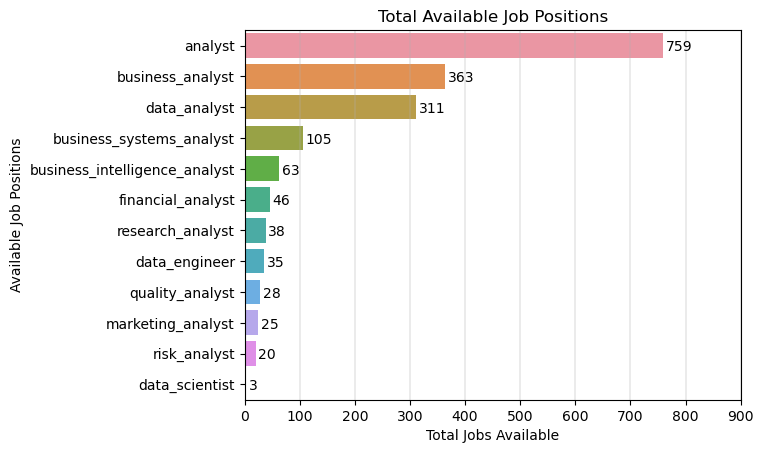

In [44]:
total_jobs = sns.countplot(data=df,
              y='job_title',
              order=df['job_title'].value_counts().index)

for rect in total_jobs.patches:
    y_value = rect.get_y() + (rect.get_height() + 0.2) / 2
    x_value = rect.get_width()
    label = '{:.0f}'.format(x_value)
    total_jobs.annotate(label,
                        (x_value, y_value),
                        xytext=(2, 1),
                        textcoords='offset points',
                        ha='left',
                        va='center')


plt.title('Total Available Job Positions')
plt.xlabel('Total Jobs Available')
plt.xlim([0,900])
plt.ylabel('Available Job Positions')

plt.grid(axis='x', linewidth=.35)
plt.show()

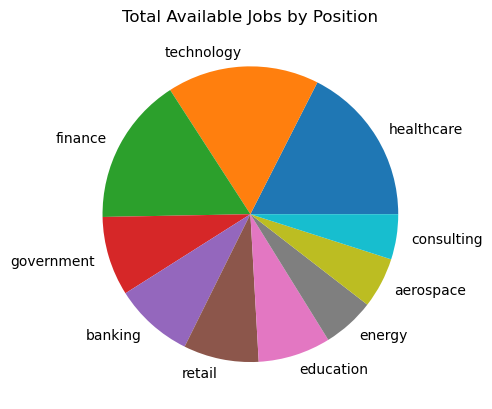

In [45]:
r = df[df['industry'] != 'other']['industry'].value_counts().head(10).plot(kind='pie')

plt.title('Total Available Jobs by Position')
plt.ylabel(None)

plt.grid(axis='y')
plt.show()

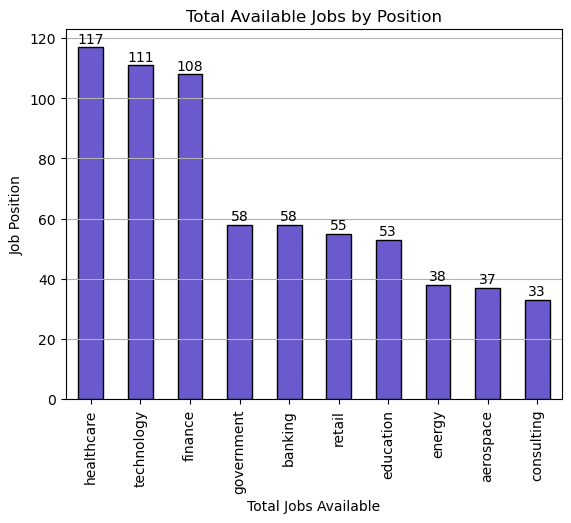

In [46]:
r = df[df['industry'] != 'other']['industry'].value_counts().head(10).plot(kind='bar',
                                                 color='slateblue',
                                                 edgecolor='black')

for rect in r.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = '{:.0f}'.format(y_value)
    r.annotate(label, (x_value, y_value), xytext=(0, space), textcoords='offset points', ha='center', va='bottom')

plt.title('Total Available Jobs by Position')
plt.xlabel('Total Jobs Available')
plt.ylabel('Job Position')

plt.grid(axis='y')
plt.show()

### Jobs by Geography

In [47]:
df[df['city'] != 'remote']['city'].value_counts().sort_values(ascending=False).head(20)

toronto        446
mississauga    117
vancouver      114
montreal       104
calgary        101
edmonton        60
markham         49
ottawa          48
brampton        38
winnipeg        30
richmond        30
north_york      26
victoria        23
london          22
surrey          21
halifax         20
burnaby         19
waterloo        17
etobicoke       15
hamilton        14
Name: city, dtype: int64

In [59]:
top_20_list = ['toronto',
               'mississauga',
               'vancouver',
               'montreal',
               'calgary',
               'edmonton',
               'markham',
               'ottawa',
               'brampton',
               'winnipeg',
               'richmond',
               'north_york',
               'victoria',
               'london',
               'surrey',
               'halifax',
               'burnaby',
               'waterloo',
               'etobicoke',
               'hamilton']

df[df['city'].isin(top_20_list)].groupby('city')['avg_salary'].mean().round(2)

city
brampton       113066.69
burnaby        118245.69
calgary        123913.33
edmonton       113893.43
etobicoke      108151.43
halifax         95500.00
hamilton       120051.11
london         110086.36
markham        116065.40
mississauga    116284.28
montreal       201882.44
north_york     127148.78
ottawa         113839.20
richmond       106249.09
surrey         126556.00
toronto        112633.97
vancouver      118585.97
victoria       131611.41
waterloo        91712.50
winnipeg       118361.70
Name: avg_salary, dtype: float64

In [50]:
# Create a map centered on Canada
canada_map = folium.Map(location=[56.1304, -106.3468],
                        zoom_start=4,
                        tiles='cartodb positron')

# Locations of top 10 hubs with most job postings (non-remote)
top_10_cities = [['43.6532', '-79.3832', 'Toronto', '446 Job Openings', ''],
                 ['43.5953', '-79.6405', 'Mississauga', '117 Job Openings', ''],
                 ['49.2462', '-123.1162', 'Vancouver', '114 Job Openings', ''],
                 ['45.5088', '-73.5616', 'Montreal', '104 Job Openings', ''],
                 ['51.0499', '-114.0666', 'Calgary', '101 Job Openings', ''],
                 ['53.6316', '-113.3239', 'Edmonton', '60 Job Openings', ''],
                 ['43.8560', '-79.3370', 'Markham', '49 Job Openings', ''],
                 ['45.4247', '-75.6950', 'Ottawa', '48 Job Openings', ''],
                 ['43.7315', '-79.7666', 'Brampton', '38 Job Openings', ''],
                 ['49.8950', '-97.1384', 'Winnipeg', '30 Job Openings', ''],
                 ['49.1665', '-123.1335', 'Richmond', '30 Job Openings', ''],
                 ['43.7615', '-79.4110', 'North York', '26 Job Openings', ''],
                 ['48.4284', '-123.3656', 'Victoria', '23 Job Openings', ''],
                 ['42.9849', '-81.2497', 'London', '22 Job Openings', ''],
                 ['49.1913', '-122.8490', 'Surrey', '21 Job Openings', ''],
                 ['44.8857', '-63.1005', 'Halifax', '20 Job Openings', ''],
                 ['49.2488', '-122.9805', 'Burnaby', '19 Job Openings', ''],
                 ['43.4643', '-80.5166', 'Waterloo', '17 Job Openings', ''],
                 ['43.6205', '-79.5131', 'Etobicoke', '15 Job Openings', ''],
                 ['43.2557', '-79.8711', 'Hamilton', '14 Job Openings', '']]

# Loop for map markers
for row in top_10_cities:
    folium.Marker(location=[row[0], row[1]],
                  tooltip=row[3],
                  popup=row[2],
                  icon=folium.Icon(color='red',
                                    icon='info-sign')).add_to(canada_map)
    
    folium.CircleMarker(location=[row[0], row[1]],
                        radius=10,
                        popup=[row[2], row[4]],
                        color='red',
                        fill=True,
                        fill_color='red').add_to(canada_map)
    
canada_map.save('canada_map.html')
canada_map

[Back to Table of Contents](#back)

## Conclusions and Reccomendations

[Back to Table of Contents](#back)

## Dataset Citation

syntax:
[Dataset creator's name]. ([Year &amp; Month of dataset creation]). [Name of the dataset], [Version of the dataset]. Retrieved [Date Retrieved] from [Kaggle](URL of the dataset).

example:
Tatman, R. (2017, November). R vs. Python: The Kitchen Gadget Test, Version 1. Retrieved December 20, 2017 from https://www.kaggle.com/rtatman/r-vs-python-the-kitchen-gadget-test.

[Back to Table of Contents](#back)